# AC Motion Control Systems

In previous notebooks, we discussed motion control systems using specific hardware. We touched upon the utilization of a DC motor as an actuator, a DC tachogenerator as a speed sensor, a potentiometer for position sensing, and other associated hardware. Our exploration was majorly rooted in DC-based components.

This notebook focuses on a different set of hardware to have _AC Motion Control Systems_.

## Comparing DC and AC Systems

Before we dive deep, let's recall our earlier discussions. In motion control systems, we analyzed two main types: **Position Control Systems** and **Speed Control Systems**. The principle remains the same, but the hardware and sometimes the intricacies change when we transition from DC to AC components.


### DC System Components:

- Actuator: DC Motor
- Speed Sensor: DC Tachogenerator
- Position Sensor: Potentiometer

### AC System Components:

- Actuator: Two-phase Servo Motor
- Speed and Position Sensor: Synchro (and other devices which we will discuss)

## The Two-phase Servo Motor

Our first point of discussion is the two-phase servo motor. 

This actuator is tasked with producing the required torque to drive the load.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor.png?1" alt="11_AC_hardware_and_case_studies_motor" style="width: 850px;"/>
</tr></table>


It's called 'two-phase' because, as evident from its name, it operates using two phases. One phase is dubbed the 'control phase', and its importance will become apparent soon. The other is termed the 'reference phase'. The rotor carries the load, which can either be directly on the rotor or via a gear train.

----

The key reason behind using two phases (or the "split-phase" concept) in certain types of AC motors is to generate a rotating magnetic field which is essential for motor operation. In a three-phase AC motor, the three phases naturally create a rotating magnetic field. In a single-phase AC motor, the magnetic field merely alternates but doesn't rotate. To overcome this, dual-phase motors utilize two windings, with a phase difference, to simulate the rotating field.

Role of the Two Phases:
- Starting Torque: One of the primary reasons for having two windings (or phases) is to produce a starting torque. Single-phase motors, without any phase-shifting mechanism, don't inherently have a starting torque, which means they won't start rotating on their own.
- Rotating Magnetic Field: By introducing a phase difference between the two windings, usually through a capacitor or by designing the windings differently, a phase lag is created between the currents in the two windings. This phase difference results in a rotating magnetic field essential for the motor operation.

----

For simplification, let's represent the load parameters as 'J' and 'B'. The rotor generates a torque $T_M$ and faces a disturbance torque $T_\omega$ which opposes $T_M$.

- Given this setup, the next component of interest is the **phase-shifting capacitor**** in the reference phase. Its role is pivotal. It ensures that we can derive a two-phase supply from a single-phase voltage source. This capacitor induces a phase difference of 90 degrees between the two phases.

The reference phase gets a voltage supply of the form $E_r\cos\omega_{c}t$, where $\omega_{c}$ is termed the carrier wave frequency, and $E_r$is the reference voltage.

- The control phase is connected to a Modulator. The input to the Modulator is the control voltage $e_c$. This is always a low frequency voltage in a control system.


### Comments 
- Remember that in a control system the objective is to make the error zero. For example, the error could be a position or speed error. 
- If the control system is functioning well, the error will be a low frequency signal and small signal.

If we consider $e_c$ as the error signal and enter as the input for the motor I would like to modulate this signal with frequency $\omega_c$, the carrier frequency.

## AC Motors and precision control

This notebook focuses on two-phase AC motors that are used in precision control applications. In this context, modulated control is implemented to achieve a desired performance characteristic, particularly in systems like servo drives. Let's break down the components:

### **1. Control Phase Voltage ($e_c$):**

This is essentially the 'input' or the 'control' voltage. It carries the information about how you want the motor to behave. For instance, if you want the motor to rotate at a certain speed or move to a certain position, this is encoded in $e_c$. It's your way of telling the motor what to do.

### **2. Modulated Voltage ($e_m$):**

This is the 'output' voltage, which is generated after modulating the control voltage with a reference. Modulation serves multiple purposes:

- **Improved Performance:** By modulating with a high-frequency carrier, motor performance can be enhanced. For instance, high-frequency modulation can reduce torque ripples in the motor.

- **Noise Immunity:** High-frequency signals tend to be less susceptible to low-frequency noise. This is beneficial in an industrial environment where there might be lots of electrical noise.

The control phase voltage ($e_c$) encodes the desired behavior of the motor. This might represent a desired speed, torque, or position. When this control voltage is combined (modulated) with the high-frequency reference voltage ($E_r$), the resulting modulated voltage ($e_m$) is applied to the second winding (often called the control or modulation phase).

### **3. Reference Voltage ($E_r$):**

$E_r$ is the carrier wave. This is a high-frequency signal that does not inherently contain any information about motor control. However, when $e_c$ (the low-frequency control signal) is modulated with $E_r$, the result is $e_m$, which has properties of both the control signal and the carrier wave.

### **Why is the reference voltage applied only to the reference phase?**

By applying the reference voltage to only one phase (often called the reference phase), the modulation is more effective in creating a differential or relative control across the phases. This differential can be more effective in creating the desired torque and speed in the motor. 

- A two-phase AC motor has two windings, typically set 90 degrees apart. The currents through these windings, when they're out of phase, produce magnetic fields that combine to form a resultant rotating magnetic field. This rotating field is what causes the rotor to turn.

- Applying the reference voltage, typically a high-frequency signal, to this phase establishes a baseline or "reference" magnetic field.

By applying the reference voltage only to the reference phase, the motor setup can create a differential magnetic field. This differential magnetic field, relative to the reference, effectively governs the behavior of the motor.

When the high-frequency reference voltage is applied to the reference phase and the modulated control voltage is applied to the other phase, the resultant magnetic field's orientation and magnitude depend on the modulated signal. This allows for precise control of the motor's position or speed based on the characteristics of the modulated signal.

If the reference voltage were applied to both phases, it would not produce a differential effect and would fail to produce the desired precision control.

In essence, by designating one winding as a "reference" and the other as "control," and then applying appropriate voltages to each, the system can create a rotating magnetic field with a controllable direction and magnitude, which is essential for precision control in applications like servo systems.


### **Role of the AC Supply:**

Despite all these control methodologies, the motor still requires power to operate. The AC supply provides this necessary power to drive the motor. All the aforementioned voltages ($e_c$, $e_m$, $E_r$) are about control and modulation, but none of them directly provide the bulk power needed to turn the motor. That's where the AC supply comes in.

### **In Summary:**

Think of the entire process as analogous to an FM radio. In FM (Frequency Modulation) broadcasting, you have a base high-frequency signal (similar to $E_r$), which is modulated by a low-frequency audio signal (similar to $e_c$). The result is a modulated high-frequency signal (like $e_m$) that can be transmitted. The radio then demodulates this signal to extract and play the audio. Similarly, in the motor control scenario, modulation is used to combine control information with a high-frequency carrier for better motor performance. The actual power to make everything work, however, comes from the main AC supply.

## Amplitude Modulation (AM)

In AM, the amplitude of the high-frequency carrier wave ($E_r$) is varied in accordance with the instantaneous amplitude of the control signal ($e_c$).

To modulate the carrier using the error signal, we'll take the product of the error signal and the carrier signal. This results in an Amplitude Modulated (AM) signal.

The envelope of an amplitude modulated (AM) signal corresponds to the instantaneous amplitude of the signal, which in our case is represented by the error signal.


### Modulation process:

1. **Carrier Wave ($E_r$)**:

This is a high-frequency sinusoidal waveform, which acts as a reference signal. Mathematically, it can be represented as:

$$
E_r(t) = A_c\sin(2\pi f_ct)
$$

where 
- $A_c$ = Amplitude of the carrier wave
- $f_c$ = frequency of the carrier wave

2. **Control Signal ($e_c$)**: This is the signal you want the motor to follow. It could represent desired speed, position, etc.

3. **Modulated Signal ($e_m$): The result of the modulation process. In AM:
$$
e_m(t) = \big[ A_c+e_c(t)\big]\sin(2\pi f_ct)
$$

### Practical Modulation Circuit:

A common circuit used to achieve amplitude modulation is the **multiplier circuit**. This circuit multiplies two input signals to produce an output signal.

1. Feed $E_r$ and $e_c$ into the two inputs of the multiplier
2. The output $e_m$ is the product of the two input signals
3. his output, which contains frequency components of both $E_r$ and $e_c$, is then passed through a bandpass filter to extract the desired modulated signal if needed.

Nowadays with communication transceivers being very digitized, the modulation is mostly done in the digital domain using a DSP type block.

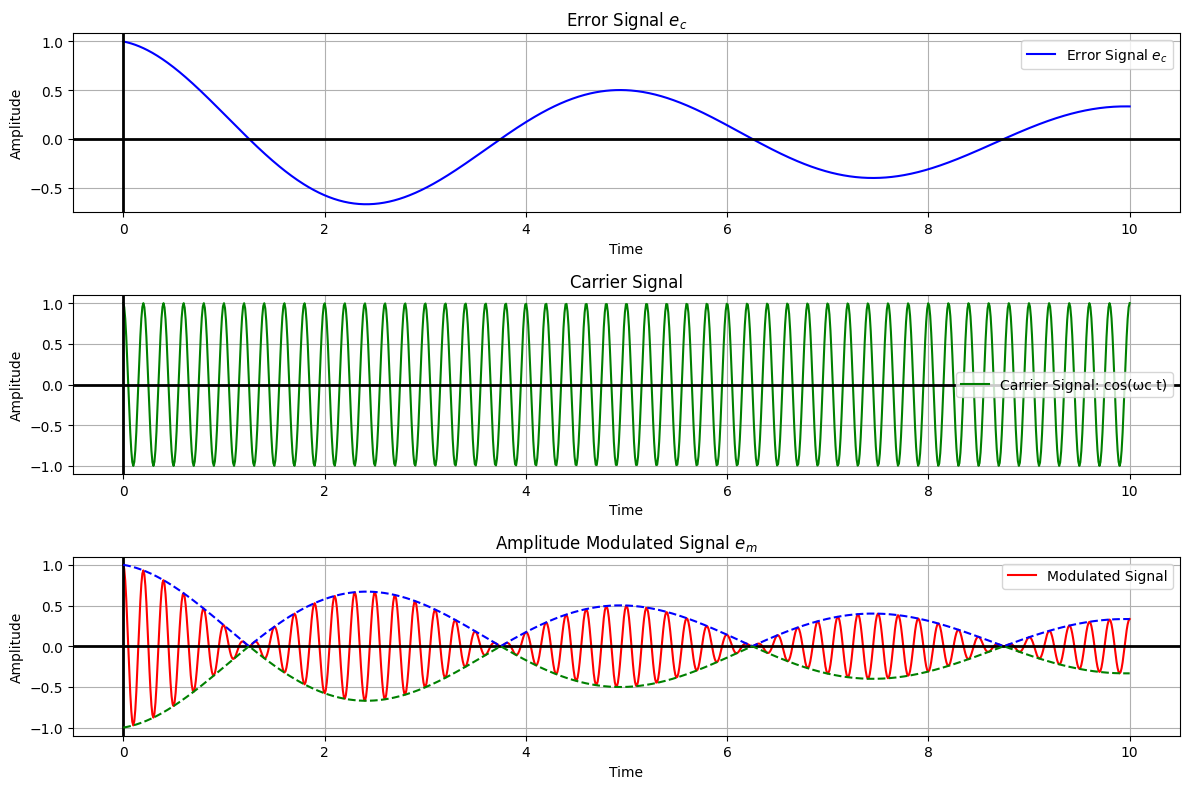

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time values
t = np.linspace(0, 10, 1000)

# Define the error signal (decreasing oscillating signal starting from its maximum)
error_signal = (1 / (1 + 0.2 * t)) * np.sin(2 * np.pi * .2 * t + np.pi/2)  # Added phase shift of pi/2

# Define the carrier signal
omega_c = 2 * np.pi * 5  # carrier frequency (for example, 10Hz)
carrier_signal = np.cos(omega_c * t)

# Modulate the carrier using the error signal
modulated_signal = error_signal * carrier_signal

# Plot
plt.figure(figsize=(12, 8))

# Plot the error signal
plt.subplot(3, 1, 1)
plt.plot(t, error_signal, label=r'Error Signal $e_c$', color='blue')
plt.title(r'Error Signal $e_c$')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Draw x=0 and y=0 axes
plt.axvline(0, color='black', linewidth=2, linestyle='-')
plt.axhline(0, color='black', linewidth=2, linestyle='-')

# Plot the carrier signal
plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal, label='Carrier Signal: cos(ωc t)', color='green')
plt.title('Carrier Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Draw x=0 and y=0 axes
plt.axvline(0, color='black', linewidth=2, linestyle='-')
plt.axhline(0, color='black', linewidth=2, linestyle='-')

# Plot the modulated signal
plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal, label='Modulated Signal', color='red')
plt.title(r'Amplitude Modulated Signal $e_m$')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Draw x=0 and y=0 axes
plt.axvline(0, color='black', linewidth=2, linestyle='-')
plt.axhline(0, color='black', linewidth=2, linestyle='-')

# Plot the positive envelope (absolute value of the error signal)
plt.plot(t, np.abs(error_signal), '--', label='Positive Envelope', color='blue', linewidth=1.5)

# Plot the negative envelope (negative of the absolute value of the error signal)
plt.plot(t, -np.abs(error_signal), '--', label='Negative Envelope', color='green', linewidth=1.5)


plt.tight_layout()
plt.show()


- Note that when the sign of $e_c$ changes, the phase of the modulated signal $e_m$ reverses (maximum of $e_c$ are the minimum of $e_m$).

- Because of this phase reversal, the magnetic flux takes place and the direction of the motor also reverses. This is a bi-directional control: 
  - when $e_c>0$ the motor moves in one direction
  - when $e_c<0$ the motor moves in the opposite direction
  
- $e_m$ is a carrier modulated wave at the frequency $\omega_c$
- the reference voltage $e_c$ is at the frequency $\omega_c$

**In conclusion:**
These two voltages applied to the two motor phases will produce a torque on the motor. The torque will be a function of $e_c$ ($e_r$ being a fixed voltage) and its direction will be a function of the sign of $e_c$.

### Torque-speed characteristics of the AC motor

A comparative view with the DC motor shows that while the latter presents almost linear torque-speed characteristics, the AC motor's curve is evidently non-linear.

The torque-speed curve of a typical shunt DC motor is relatively straightforward compared to an AC motor. The torque is roughly linearly dependent on the armature current, and as the speed increases, the torque generally decreases linearly due to the motor's back EMF (electromotive force) opposing the supply voltage.

The linear characteristics of DC motors is an advantage because the model is simpler.

If we do an experiment these are typical curves that we would obtain:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_torque_speed_dc_ac_linear_2.png?1" alt="11_AC_hardware_and_case_studies_motor_torque_speed_dc_ac_linear_2" style="width:750px;"/>
</tr></table>

Once torque-speed curves for motors are determined experimentally, the resultant data can pave the way for the formulation of precise mathematical models.

Such a non-linear characteristic of AC motors can pose challenges, especially if we wish to operate them over a wide range. But, one of the saving graces for AC motors is their almost linear behavior around the zero speed, making them suitable for position control systems.

At steady state, the speed is zero and the position of the load is equal to the commanded position: the motor does not move. Around this point you have a linear behaviour that we can use and model.

For this reason, we will only focus on the linear models of the AC motors, under the assumption that the operating point is speed = 0.

### Linear Torque Equation for AC Motors

Given that for our position control problem we can assume that the operating point is $\text{speed}=0$, the torque equation is a function of the control voltage $e_c$, and of the speed $\dot{\theta}$:

$$
T_M = K_1e_c-K_2\dot{\theta}
$$

where:
- $K_2$ is the determining factor to relate torque and speed and is the slope of the linear approximation of the Torque-Speed curves in the AC Motors plot above (when speed $\approx$ 0).
- The control voltage $e_c$ is key because it causes it to move from one curve to another (in the diagram above $e_{c_1}>e_{c_2}>e_{c_3}$)
- When the control voltage increases, the torque increases
- When the speed increases, the torque decreases

Once the curves are experimentally determined, we can get the corresponding parameters for our linear model. 

- From the Torque-Speed curves in the AC Motors plot above  we can directly infer the constant $K_2$
- To obtain $K_1$, one could plot the control phase voltage $e_c$ against the torque $T_m$ (see plot below). The slope of the resultant line under conditions of constant speed (say $\omega = 0$), will provide the value for $K_1$. This approach assumes a linearity model for a device, which holds true for certain operation ranges.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_torque_speed_ac_linear_2.png?2" alt="11_AC_hardware_and_case_studies_motor_torque_speed_ac_linear_2" style="width:350px;"/>
</tr></table>



### AC Motor Equation

We are now ready to write the mathematical model of the AC motor:

$$
T_M = K_1e_c-K_2\dot{\theta} = J \ddot{\theta} + B\dot{\theta} + T_W
$$

where we have now added the load and:
- $T_M$ is the Torque developed by the motor
- $e_c$ is the control phase voltage
- $\dot{\theta}$ is the speed of the motor
- $K_1$ and $K_2$ are constant experimentally determined
- $J \ddot{\theta}$ is the inertial load
- $B\dot{\theta}$ is the damping
- $T_W$ is the disturbance torque on the system.

We can re-write the equation above as:

$$
K_1e_c = J \ddot{\theta} + (B+K_2)\dot{\theta} + T_W
$$

where $e_c$ is my input.



### AC Motor Block Diagram

This entire discourse can be visually represented using a block diagram, highlighting the relationships between $e_c$, $\theta$, $\omega$, and other system parameters.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_torque_speed_dc_ac_linear_block_diagram_corrected.png?1" alt="11_AC_hardware_and_case_studies_motor_torque_speed_dc_ac_linear_block_diagram_corrected" style="width:550px;"/>
</tr></table>

Through the block diagram representing the system, it is possible to derive a transfer function, linking $e_c$ (input) and $\omega$ or $\theta$ (output).

1.  Transfer function between $\omega$ and $e_c$:

$$
\frac{\omega}{e_c} = \frac{K_1}{Js+B+K_2}
$$

- Note that $K_2$ is adding to the system's mechanical damping, reminiscent of the DC armature controlled motor's behavior.

- $K_2$ directly adds to the damping, affecting the stability and response of the system. Moreover, the time constant of the system becomes
$$
\tau = \frac{J}{B+K_2}
$$

indicating that $K_2$ influences how fast the system responds to changes.



🤔 **Popup Question**: How does the magnitude of $K_2$ impact the damping and time constant of the system?

**Answer**: $K_2$ directly adds to the damping, affecting the stability and response of the system. Moreover, the time constant of the system becomes $\tau = \frac{J}{B+K_2}$ indicating that $K_2$ influences how fast the system responds to changes.


#### Sidebar - a typical induction motor

The torque speed characteristics of a normal induction motor is reported in the graph below.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_torque_induction_motor.png?1" alt="11_AC_hardware_and_case_studies_motor_torque_induction_motor" style="width:550px;"/>
</tr></table>

Can we use this two-phase induction motor for servo applications? 

To answer this question consider the transfer function

$$
\frac{\omega}{e_c} = \frac{K_1}{Js+B+K_2}
$$

where $K_2$ adds to the damping.

If $K_2$ is negative, depending on its relationship to $B$ (remember that it enters in $B+K_2$), might lead to instability.

A characteristic curve, especially one that exhibits a negative slope, may introduce negative damping, leading to excessive oscillations and possibly culminating in instability or excessive oscillations (hunting) in the system. $B$ should be extremly high to counteract the effects of a negative $K_2$.

For this reason, a normal induction motor is never used for servo applications (position or speed controlled systems).

🤔 **Popup Question**: Why might an ordinary induction motor not be suitable for servo applications?

**Answer**: An ordinary induction motor might exhibit characteristics where the slope becomes negative, introducing the possibility of negative damping, which could lead to instability or excessive oscillations in the system, especially in the context of servo applications where precise control is important.


Recall that the torque-speed characterists of the AC servo motors that we used are reported in the picture below (left):

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_torque_speed_dc_ac_linear_2.png?1" alt="11_AC_hardware_and_case_studies_motor_torque_speed_dc_ac_linear_2" style="width:750px;"/>
</tr></table>

- These characteristics have an always positive $K_2$. 

#### Achieving positive slope torque-speed characteristics

- These characteristics are obtained directly from the induction motor, specifically by using a high rotor resistance.

A higher rotor resistance ensures that the motor's response characteristics remain positive.

In essence, a servo motor is an induction motor with high rotor resistance. Such a design choice ensures the servo motor's characteristics always exhibit a positive slope. However, this choice comes with trade-offs:

- High rotor resistance means the overall system efficiency will be reduced.
- Despite the reduction in efficiency, the design is essential for specific applications like servo systems where a negative slope could be detrimental.

--- END OF SIDEBAR

### Going Back to the Motor Model

Let's look at the mathematical representation of the motor:

The motor model is given by:

$$
\frac{\omega}{e_c} = \frac{K_m}{\tau_m s + 1}
$$

where:
- $\omega$ is the speed of the motor
- $e_c$ represents the control voltage
- $K_m$ is the motor gain
- $\tau_m$ is the mechanical time constant of the motor.

This is a first-order system between speed and the control voltage.


🤔 **Popup Question**: Why is the equation between $\theta$ (position) and control voltage is a second-order system?

**Answer**: The equation for $\theta$ incorporates an additional factor of 's' due to the integral relationship between speed and position.


The motor model between $e_c$ and $\theta$ is given by:

$$
\frac{\theta}{e_c} = \frac{K_m}{s\big(\tau_m s + 1\big)}
$$

And this is the same as the armature controlled DC motor (which is a second-order model).


### Understanding Control Phase Voltage

- $e_c$ or control phase voltage is typically a low-frequency signal.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_more_notes.png?1" alt="11_AC_hardware_and_case_studies_motor_more_notes" style="width:750px;"/>
</tr></table>

- Consider the situation where the control phase voltage might directly be a high-frequency modulated signal.

In this case your input is $e_m$ and the output is $\theta$. Let's see what is the transfer function between them.

### Sidebar - understanding the input of the AC motor - Carrier Modulated Signal

To understand the input to the motor let's consider a feedback system:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_motor_understanding_input.png?2" alt="11_AC_hardware_and_case_studies_motor_understanding_input" style="width:750px;"/>
</tr></table>

- The input to the motor is the control phase voltage $e_c$. That however depends on the device (e.g., an amplifier) between the summing junction and the motor.

- The control phase voltage $e_c$ depends on 'Device'. This device might produce a low frequency signal exactly as we discussed so far.

- Suppose instead that this devide produces a Carrier Modulated Signal and this is the signal used as control phase voltage $e_c$


If the input signal is the one reported below (ampliture modulated signa):

- The actual control information is embedded in the envelope of the modulated signal.
- The carrier frequency (like 50 Hz, 400 Hz, 1000 Hz) is primarily an operational aspect and depends on the motor design. It is the operational frequency of the motor. It depends on what the manufacturer has given us. 
- The operating frequency (the carrier frequency) can be selected for example based on the noise frequency. If we know that the motor will work in an environment where there are low frequency noise I should choose a high carrier frequency.
In environments like aircraft systems, there's abundant low-frequency noise. Using a high-frequency motor like 1000 Hz helps reduce the impact of this noise. For ground applications we typically use lower frequency. It depends on the application.


In this case, the mathematical model of the system can be taken as the relationship between the speed ($\omega$) or the position ($\theta$) - output - and the envelope of the carrier modulated signal - input -.

In summary:

- if the input signal is directly a low frequency signal and is going to the AC motor through a modulator, that low frequency signal will be taken as the input for the motor
- if the input signal to the motor is a carrier modulated signal, then our input from a control perspective is the envelope of the modulated signal. This is what is carrying the information, for example represents the difference between the commanded position and actual position.


#### Linking to the Mathematical Model

To reiterate, the mathematical model we use, $\frac{\omega}{e_c} = \frac{K_m}{\tau_m s+ 1}$, focuses on the relationship between motor speed ($\omega$) and the information-carrying signal $e_c$. The carrier signal's frequency is not of primary concern for our control applications.



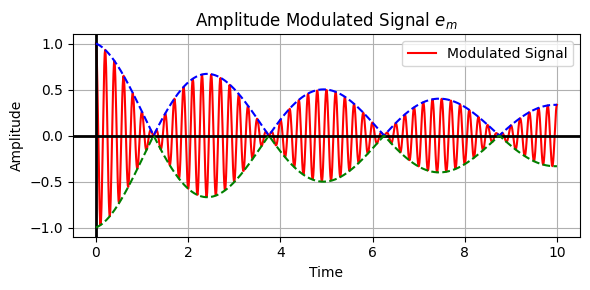

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Time values
t = np.linspace(0, 10, 1000)

# Define the error signal (decreasing oscillating signal starting from its maximum)
error_signal = (1 / (1 + 0.2 * t)) * np.sin(2 * np.pi * .2 * t + np.pi/2)  # Added phase shift of pi/2

# Define the carrier signal
omega_c = 2 * np.pi * 5  # carrier frequency (for example, 10Hz)
carrier_signal = np.cos(omega_c * t)

# Modulate the carrier using the error signal
modulated_signal = error_signal * carrier_signal

# Plot
plt.figure(figsize=(6, 3))

# Plot the modulated signal
plt.subplot(1, 1, 1)
plt.plot(t, modulated_signal, label='Modulated Signal', color='red')
plt.title(r'Amplitude Modulated Signal $e_m$')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Draw x=0 and y=0 axes
plt.axvline(0, color='black', linewidth=2, linestyle='-')
plt.axhline(0, color='black', linewidth=2, linestyle='-')

# Plot the positive envelope (absolute value of the error signal)
plt.plot(t, np.abs(error_signal), '--', label='Positive Envelope', color='blue', linewidth=1.5)

# Plot the negative envelope (negative of the absolute value of the error signal)
plt.plot(t, -np.abs(error_signal), '--', label='Negative Envelope', color='green', linewidth=1.5)


plt.tight_layout()
plt.show()


**Carrier Modulated Signal (CMS) - further comments**

The concept of a Carrier Modulated Signal (CMS) often arises in the context of communication and control systems, particularly when we need to transmit or utilize a signal that, by itself, isn't suitable for direct transmission or application due to certain limitations.

**Carrier Modulated Signal (CMS)**: In essence, modulation involves changing some aspect of a higher frequency carrier wave in proportion to the lower frequency message signal that you want to send. The carrier wave, on its own, doesn't carry any useful information. It's the modifications made to it (modulation) by the message signal that conveys the desired information.

**Why Modulate?**: Let's consider an analogy. Imagine you want to send a small paper boat across a large pond. If you simply place it in the water, it might not go far. But if you place it on top of a larger, powered boat (the carrier), it can travel across the pond effectively. In this analogy, the paper boat is like your low-frequency signal, and the larger boat is your carrier signal.

**Low-Frequency Signal vs. CMS**: In many practical applications, low-frequency signals are challenging to transmit, apply, or detect for several reasons:
- They might not effectively induce a response in certain systems.
- They might be more susceptible to interference or noise.
By modulating a carrier signal with the low-frequency signal, we can overcome these limitations.

**Relation to Motors**: If you're talking about using CMS in the context of motor control, the concept can be seen as similar to Pulse Width Modulation (PWM). With PWM, a high-frequency carrier (a square wave) is modulated in such a way that its duty cycle (the proportion of time it's "on" versus "off") represents the desired control signal, often for controlling motor speed or position.

For motors, this has benefits:
- It allows for more efficient and rapid control.
- The high-frequency nature of the carrier ensures efficient energy transfer and can reduce wear on motor components.
- The actual power applied to the motor can be finely controlled by simply varying the duty cycle.

## AC Error Detector and Synchro Transmitters-Transformers for Position Control Systems

One key component necessary for understanding and executing position control systems is the AC error detector. In the given discourse, the AC error detector is explained through the introduction of two devices: the synchro transmitter and the synchro Control Transformer.

### Synchro Transmitter

The transmitter is a device that transmits an electrical signal corresponding to the angle of rotation of its shaft.

From the outside, a synchro transmitter (or receiver) looks much like an ordinary small motor

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_transmitter_CHAPTER-10-PAGE-215-FIGURE-10B2.jpg?2" alt="11_AC_hardware_and_case_studies_synchro_transmitter_CHAPTER-10-PAGE-215-FIGURE-10B2.jpg" style="width:750px;"/>
</tr></table>

_Figure from [USNavy AUTOMATIC CONTROL EQUIPMENT](https://eugeneleeslover.com/USNAVY/CHAPTER-10-B.html)_


- A synchro transmitter is an AC transmitter. It's constructed with a dumbbell-shaped rotor, through which an AC voltage is supplied via slip rings. The stator has three windings, schematically shown as S1, S2, and S3.

- The three windings, with a 120-degree space distribution, allow for encoding the position of the rotor in a way that can be represented through three different voltages.
You are not changing the AC voltage, you change the rotor position. When you change the rotor position the three voltages at the three terminal changes accordingly.

- The AC voltage (a fixed voltage) given to the rotor produces a magnetic flux which, when linked with the stator windings, induces an EMF at terminals 1, 2, and 3. The voltages at these terminals carry the information of the rotor position, represented as theta ($\theta$).

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_transmitter_diagram.png?2" alt="11_AC_hardware_and_case_studies_synchro_transmitter_diagram" style="width:450px;"/>
</tr></table>


With respect to the diagram above, taking $S_2$ as reference axis:
- When $\theta=0$, the maximum flux (i.e., the maximumm voltage) is on $S_2$ with value: $ e_{S_2n} = KE_r\sin(\omega_c t) $, where $K$ is a constant that adjusts the amplitude as needed.
- When $\theta=0$, the flux (i.e., the voltage) on $S_2$ has value: $0$

In general, the mathematical relationship between the rotor position ($\theta$) and the voltage (with respect to neutral $n$) can be expressed as:

$$
\begin{align}
e_{S_2n} &= KE_r\sin(\omega_c t) \cos(\theta)\\
e_{S_1n} &= KE_r\sin(\omega_c t) \cos(\theta -120^o)\\
e_{S_3n} &= KE_r\sin(\omega_c t) \cos(\theta -240^o)
\end{align}
$$

since we do not have access to _neutral_, we have:

$$
\begin{align}
e_{S_1S_2} &= \sqrt{3}KE_r\sin(\omega_c t) \sin(\theta+240^o)\\
e_{S_2S_3} &= \sqrt{3}KE_r\sin(\omega_c t) \sin(\theta+120^o)\\
e_{S_3S_1} &= \sqrt{3}KE_r\sin(\omega_c t) \sin(\theta)
\end{align}
$$

We can calculate the above expression as:

$$
e_{S_1S_2} = e_{S_1n} + e_{nS_2} = e_{S_1n} - e_{S_2n} 
$$

With reference to equations (4-6):

- when $\theta=0$, $e_{S_3S_1} =0$ and the rotor is in its _null_ position (reference position of the rotor).

- when the rotor is in the null position, the maximum voltage is on the $S_2$ winding, and the voltage across $S_3$ and $S_1$, $e_{S_3S_1} =0$

Note also that only the amplitude of the voltages are changing. This is a single phase device. The three voltages are in phase.

**A synchro transmitter has an input which is the rotation of its shaft ($\theta$) and the output are the three voltages**

### Synchro Control Transformer

In the context of the position control system, another essential device is the synchro Control Transformer. This device shares many similarities with the synchro transmitter, except for its rotor construction. The rotor in this transformer is more cylindrical. This construction ensures a constant impedance as viewed by an accompanying signal conditioning device, ensuring that this impedance remains unaffected by the rotor's position.

If the rotor is not cylindrical then impedance seen by the signal conditioning device is a function of the rotor position.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_transmitter_controller_diagram.png?2" alt="11_AC_hardware_and_case_studies_synchro_transmitter_controller_diagram" style="width:750px;"/>
</tr></table>


**Note that nothing prevented as to use a cylindrical rotor in the Synchro transmitter described above as well. However in that case was not a requirement and using a dambbell rotor probably is less expensive.**

The signal conditioning device processes the output from the synchro Control Transformer and drives a motor. This motor controls the position of the rotor in the synchro Control Transformer. The two stator windings of the synchro transmitter and the synchro Control Transformer are interconnected, with the rotor position of one representing the reference and the other the controlled position.

In the control tranformer, the output of the signal conditioning device is going to a motor which controls the position of the cylindrical rotor.

The input for the overall system, composed of both a transmitter and a transformer, is the difference of the movements of the two shafts $\theta_R$ and $\theta_C$, and the output is the signal at the entry of the signal conditioning device, which is proportional to the difference of the two shaft positions.

#### Potentiometer Pair Recall

You might recall our discussion about a potentiometer pair. To illustrate:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_potentiometers.png?2" alt="11_AC_hardware_and_case_studies_potentiometers" style="width:550px;"/>
</tr></table>


From our study, the signal $e$ can be represented as:

$$
e = K_p\big(\theta_R - \theta_C\big)
$$

here, $K_p$ is a potentiometric constant, and the expression emphasizes the difference between the two shaft positions.

### Synchro Pair Mechanics

The synchro pair operates in a similar way, but it specifically manages AC and focuses to high-frequency signals.

Let's continue reference our Synchro pair:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_transmitter_controller_diagram.png?2" alt="11_AC_hardware_and_case_studies_synchro_transmitter_controller_diagram" style="width:750px;"/>
</tr></table>

- $\theta_R$ denotes the reference position.
- $\theta_C$ symbolizes the controlled position.

Our ultimate goal is to harness this device as an error detector, obtaining a signal that represents the difference (or error) between $\theta_R$ and $\theta_C$. 

If we have this, we have in fact everything we need complete our position control feedback loop, where $\theta_R$ is the input and $\theta_C$ is the output that we want to control.

### Synchro Transmitter Working

Considering the synchro transmitter, imagine the following flux pattern:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_error_diagram.png?2" alt="11_AC_hardware_and_case_studies_synchro_error_diagram" style="width:750px;"/>
</tr></table>

The synchro transmitter sends out a specific flux pattern based on its position. The synchro control transformer receives a similar flux pattern. The angle between the synchro transmitter and the synchro control transformer is represented by the angles θ (for the transmitter) and α (for the control transformer).

_Given that the induced EMF because of this flux pattern is directed to the synchro control transformer, we can conclude that the flux pattern in the latter will be identical._

With a certain rotor position of the synchro control transformer, the voltage induced in its rotor can be represented as $e$.

**🤔 Pop-up Question**: What is the induced voltage in the rotor of the control transformer when the synchro transmitter is in the null position?

**Answer**: The induced voltage is zero. When the synchro transmitter is in its null or zero position, the flux pattern aligns in such a way that no voltage is induced in the rotor winding of the synchro control transformer.

### Voltage Induction as Positions Change

If the synchro transmitter rotates by $\theta$ and the control transmitter rotor rotates by $\alpha$, the net angle between the transmitter and the control transformer's axis is 
$90-\theta-\alpha$.

In this case, the induced voltage $e_m$ is given by:

$$
e_m = K^{'}E_R\cos(90-\theta-\alpha)\sin(\omega_c t)
$$

Here, when the angle difference between $\theta$ and $\alpha$ is 90 degrees, we term the synchro pair's operational state as the "electrical zero position". In this position, the voltage induced in the rotor winding will be zero.

And this is what we also discussed before (see equations 1-6).

In other words:

If the synchro transmitter rotor rotates by an angle $\theta$ and the synchro control transformer rotor rotates by an angle $\alpha$, the net angle between the axes of the transmitter and the control transformer is given by $90−\theta+\alpha$. The voltage $e_m$ induced in the control transformer under these conditions is:

$$
e_m = K^{'}E_R\cos(90-\theta-\alpha)\sin(\omega_c t)
$$

Where:
- $K^{'}$ is a constant.
- $E_R$ is the voltage related to the transmitter.
- $\omega_c$ is the operational frequency.


**Simplification**: The above expression can be simplified to:

$$
e_m = K^{'}E_R\sin(\theta-\alpha)\sin(\omega_c t)
$$

This representation makes it clear that the induced voltage $e_m$ is a function of the difference in the angles $\theta$ and $\alpha$.

### For Feedback Control Systems

In the context of a feedback control system, the difference between the angles $\theta$ and $\alpha$ represents the error $\phi$.

As soon as $\theta - \alpha = \phi$ is different from zero, a good control system will try to get it back to zero. This is because a good control system will try to minimize this error. 

In the context of a feedback control system, the difference between the angles $\theta$ and $\alpha$ will be small (designated as $\phi$). This is because a good control system will try to minimize this error. 

When this difference is small, $\sin(\theta-\alpha) \approx \phi$ and the expression for $e_m$ can be approximated as:
  
$$
e_m = K^{'}E_R\phi(t)\sin(\omega_c t)
$$

**This simplifies the complex non-linear sinusoidal relationship into a linear one, especially when considering the device as an error detector in a feedback mechanism.**

Note that this is an approximation that only holds if $\phi$ is small. In a control system that is actively trying to reduce $\phi$ this is a reasonable assumption. When the synchro pair is not part of a feedback control system and $\phi$ can take any value, this assumption is no longer valid.

### Deriving the transfer function

Now, let's turn our attention to the device's input-output configuration.

Given the model:

$$
e_m = K^{'}E_R\phi(t)\sin(\omega_c t)
$$

The input for the device is $\phi(t)$, which represents the error between the positions of the reference shaft and the feedback or controlled shaft.

The output is $e_m$, which is available at the rotor terminals of the control transformer.

However, deriving a transfer function for this system is more complicated. The relationship between $e_m$ and $\phi$ includes a term $\sin(\omega_c t)$, making the mathematical representation complex (Note that this is a modulation operation).

As we discussed before, here $\omega_c$ denotes the operational frequency of the device, which could be values like 50 Hz, 400 Hz, or 1000 Hz. Since it's the operational frequency, it doesn't inherently provide information about the system's error.

- we can write: 
$$
e_m = K^{'}E_R\phi(t)\sin(\omega_c t) = e_c(t)\sin(\omega_c t)
$$

which will be of the form (output of the synchro error detector):

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_pair_error_signal.png?1" alt="11_AC_hardware_and_case_studies_synchro_pair_error_signal" style="width:750px;"/>
</tr></table>

- The error $\phi(t)$ is given by $e_c(t)$, which is the envelope of the signal above.
The carrier does not contain any information about the control action. If it present only because the device is operating at frequency $\omega_c$.

This realization implies that for a mathematical model, we should be concerned primarily with the envelope $e_c$ and not the entire modulated output $e_m$. Thus, the model becomes more straightforward, treating $\phi$ as the input and $e_c$ as the output.

And now we can write the transfer function of the Synchro Error Detector as:

$$
\frac{E_c(s)}{\phi} = K_s
$$

This constant $K_s$, known as the sensitivity of the synchro error detector, plays a pivotal role in understanding the flow of information in the system. This constant does not depend on the carrier frequency.

This sensitivity, akin to the potentiometric constant $K_P$ in the potentiometer pair, remains constant regardless of the carrier frequency.

To reiterate, while the carrier frequency, $\omega_c$, is essential for device operation, our analytical focus is more on the error envelop $e_c$ rather than the modulated signal 
$e_m$. This distinction arises from the nature of control systems: it's the error, not the carrier frequency, that imparts valuable information about system performance.

### Symbolic representation of the synchro error detector

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_synchro_pair_symbol.png?1" alt="11_AC_hardware_and_case_studies_synchro_pair_symbol" style="width:750px;"/>
</tr></table>


## Linear Variable Differential Transformer (LVDT)

After understanding the synchro error detector's rotary motion, we can further explore a linear device that demonstrates similar action. This device, called the Linear Variable Differential Transformer (LVDT), gives an output signal proportional to linear motion.


PICTURE

The functioning of LVDT is intuitive. When the core is positioned centrally, the net voltage is zero due to equal linkage of flux lines to both secondary coils (the secondary windings are in phase oppoistion). Moving the core in one direction links more flux lines to one coil, resulting in a voltage of a specific polarity. The opposite movement reverses the polarity. The voltage's **polarity** and magnitude indicate the direction and extent of the core's displacement, respectively.

- **polarity**: gives you direction
- **magnitude**: give you extent of displacement

Just like the synchro device gives an output related to angular motion, LVDT provides an output based on linear motion. The relationship can be represented as:

$$
e_m = KE_ry(t)\sin(\omega_c t)
$$

- $e_m$ is the output which is a modulated signal.

Similar to the previous discussion, we focus on the envelope $e$, which is

$$e=KE_ry(t)=K_sy(t)$$ 

which is the part that carries the information, to construct our mathematical model ($K_s$ is the sensitivity of the device).


## Tachogenerator

Let's take a moment to look closely at the tachogenerator. The tachogenerator is a device that translates rotational speed into an electrical signal, commonly used for feedback in motor control systems.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_tachogenerator.png?1" alt="11_AC_hardware_and_case_studies_tachogenerator" style="width:450px;"/>
</tr></table>



The input for the tachogenerator is denoted as $\dot{\theta}$.

The tachogenerator has a reference winding and takes $E_r\sin(\omega_c t)$ as its input.

The output is a modulated signal, represented as $e_m$ and depends on the frequency $\omega_c$ (the carrier) and $\dot{\theta}$ (the mechanical input to the rotor).
The full expression for $e_m$ is:

$$
e_m = KE_r\omega(t)\sin(\omega_c t)
$$
 
 
This modulated signal contrasts with the output from a DC tachogenerator, which was a direct low-frequency signal proportional to speed. The output of the DC tachogenerator was directly proportional to speed, the output was a DC signal. However, mathematical modeling provides a similar representation for both.

The DC tachogenerator produces a direct low-frequency signal proportional to speed, while the AC tachogenerator produces a modulated signal.

The error signal, $e$, is represented as:

$$
e= K_t \omega(t)
$$

(similar to the DC motor).

Here, it's essential to understand that the signal's information is carried by the envelope, not the carrier. Thus, demodulation is assumed to extract this envelope.

# Reviewing the Motor Control 

We are now ready to revisit the AC Motor Control.

The two-phase motor has a reference winding and a phase-shifting capacitor. This capacitor helps in achieving the desired phase shift for the control.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_ac_motor.png?1" alt="11_AC_hardware_and_case_studies_ac_motor" style="width:450px;"/>
</tr></table>

The motor's input comes directly or through a modulator, and it's essential to recognize that no modulator is needed if a synchro error detector feeds the control phase voltage. This is because the synchro error detector directly provides a modulated signal.

At the same time, even though we have a modulated input $e_m$ the mathematical model will consider the envelope only of that signal because that is the information part.

🤔 **Popup Question**: Why might a modulator not be necessary with a synchro error detector?

**Answer**: Because the synchro error detector directly outputs a modulated signal suitable for the motor.

### Mathematical Modeling of the Motor

The torque-speed equation for the motor is represented as:

$$
T_M = K_1e_c - K_2\dot{\theta} = J\ddot{\theta} + B \dot{\theta} + T_W
$$

where
- $T_M$ is the motor torque
- $e_c$ is the envelope of the input to the control phase voltage
- $K_1$ and $K_2$ are constants

We can represent the previous model as the following block diagram where we are expliciting the torque $T_M$ generated by the motor.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_ac_motor_1.png?1" alt="11_AC_hardware_and_case_studies_ac_motor_1" style="width:650px;"/>
</tr></table>

Note that the motor has an inherent feedback loop, identical to the situation we had with armature controlled motors.

If we want to have $\theta$:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_ac_motor_2.png?1" alt="11_AC_hardware_and_case_studies_ac_motor_2" style="width:650px;"/>
</tr></table>

This is the diagram that is usually used when an AC motor is used in feedback controls.

# Real-world Application: Controlling a Telephoto Camera

We have assembled our toolkit and gained a robust understanding of its components. Now, it's time to venture into a practical scenario.

## The Control Problem

Let us consider a situation where we have a heavy telephoto camera. The goal is to precisely control the position of this camera. To accomplish this, we will utilize an AC motor. To ensure a smooth motion and precision, we will also consider other devices and mechanisms to aid the motor.


<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera.png?1" alt="11_AC_hardware_and_case_studies_telephoto_camera" style="width:750px;"/>
</tr></table>



The system has the following components:

- A gear train for torque magnification and speed reduction. The primary and secondary gears have teeth $N_1$ and $N_2$ respectively.
- A disturbance, $T_W$, acting on the system.
- An AC motor that generates a torque labeled as $T_M$ and has a position of $\theta_M$. The motor has two windings, a reference winding with the phase shifting capacitor, and a control phase winding which has the modulated signal $e_m$. The modulated signal should be proportional to the error between the commanded position and the actual position $\theta_L$.
- A spotting scope which provides a command signal $\theta_R$.
- The error $\theta_R - \theta_L$ should be reflected through the voltage $e_m$. This is obtained using a synchro pair, comprising a synchro transmitter and a synchro control transformer. The synchro control is mechanically connected to the camera to read the camera position $\theta_L$. The synchro transmitter is connected to a spotting scope that provides the reference input $\theta_R$.
 
🤔 **Popup Question**: How do we give the command?
**Answer**: The spotting scope gives the reference signal. A synchro error detector that measures the difference between the commanded and actual positions. 


🤔 **Popup Question**: Why is a gear train required in the system?
**Answer**: A gear train is required to magnify the torque because the motor alone cannot produce the substantial torque necessary to rotate the heavy telephoto camera.

### Understanding the Synchro Pair

The synchro pair, comprising of a transmitter and a control transformer, is crucial. The transmitter is influenced by $\theta_R$ and the control transformer rotor by $\theta_L$. This creates a modulated signal, which is essentially a mix of a constant carrier frequency and an amplitude that depends on the error between $\theta_R$ and $\theta_L$. 

### Role of the Amplifier

Since the modulated signal might not have enough power to drive the AC motor, an amplifier is introduced. It enhances the strength of the signal, ensuring the motor operates effectively.

### Signals
As stated, the signals in this case don't require modulation or demodulation. This is because they're inherently compatible with the devices they interact with. The equation $\theta_R - \theta_L$ involves DC signals, and the output of the synchro control is a modulated signal that can be used to drive the motor.

The synchro device indeed acts as a modulator. It takes in a DC signal ($\theta_R - \theta_C$) and outputs a modulated signal with frequency $\omega_c$. This signal is then amplified by an AC amplifier to produce another modulated signal. 

Note that the reference frequency for these two devices (synchro and motor) must be $\omega_c$ for compatibility.

### AC Motor as a Demodulator

The AC motor's role can be likened to a demodulator since it processes the modulated signal to produce a torque $T_M$ and position ($\theta_M$), both DC signals. This implies the synchro device (modulator) and the AC motor (demodulator) are harmonious in their operation, ensuring the input and output of the entire system remain DC signals.

### Mathematical Model & Block Diagram

Based on the dicussions above, to derive a mathematical model, we remove the carrier frequency.

To do this, we will start with a block diagram and then reduce it to a suitable transfer function.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera_block_diagram
.png?2" alt="11_AC_hardware_and_case_studies_telephoto_camera_block_diagram
" style="width:750px;"/>
</tr></table>


Notably, $\theta R$ is compared with $\theta_L$ to produce an error signal. This resulting signal undergoes various transformations involving constants like $K_s$, $K_A$, and $K_1$. And finally, we can include disturbance signals and feedback mechanisms:

The disturbance $T_W$ affects the motor indirectly via a gear set, causing a reflected disturbance of $nT_W$. Similarly, parameters like $J_L$ and $B_L$ from the telephoto camera, when reflected onto the motor shaft, morph into equivalent values $J$ and $B$.

The primary objective of this control system is for $\theta_L$ (telephoto camera position) to mimic $\theta_R$ (spotting scope position) seamlessly. It's desirable to have no transients in this motion, and the steady-state error should be minimal or zero. This outlines the _control design problem_.

### Control Design
Note that this block diagram includes a controller in the form of a proportional controller. This is the pure amplifier $K_A$. In the future it might be replaced with a more advanced controller that could employ proportional, integral, derivative, or even other advanced control actions that will take into account the desired performance specifications.


## Using a DC Motor

Let's consider a feedback control system where we want to drive a specific load. We can imagine this load as a component that needs to be operated upon by an external entity, say a motor.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor
.png?2" alt="11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor
" style="width:750px;"/>
</tr></table>


The given parameters for this load are:

- Moment of inertia: $J_L$
- Damping coefficient: $B_L$
- Disturbance torque: $T_W$
- Position: $\theta_L$
 

🤔 **Popup Question**: What is the significance of each of these parameters in determining the load's behavior?

**Answer**: Moment of inertia ($J_L$) gives us an idea of the load's resistance to changes in motion. Damping coefficient ($B_L$) is a measure of the resisting force when the load is in motion. Disturbance torque ($T_W$) is an external force affecting the load. The position ($\theta_L$) tells us the current state or position of the load.

We have been given two constraints for our control system:
- We must use a **DC motor** and not an AC motor as our actuator. The reason is that DC motors exhibit linear torque-speed characteristics, and they can handle more torque for a given size compared to an AC motor.
- Instead of a potentiometric error detector, we'll use a **synchro error detector**. The synchro error detector is preferred due to its better resolution, linearity, ruggedness, and absence of contact problems commonly found in potentiometric error detectors.

We need to determine how to interface the synchro control transformer's output signal with the DC motor's armature, post amplification.

- We want to use the DC motoro as an actuator and the syncro pair as an error detector.
- We also assume that our controller is a PD controller


In the diagram below, how to we connect the components together?

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_1
.png?2" alt="11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_1
" style="width:750px;"/>
</tr></table>

### Linking the Synchro Pair to the DC Motor:

To interface the synchro pair to the DC motor:

1. Extract the envelope of the synchro control transformer's output using a demodulator. This is crucial because we're interested in the information signal about the error and not the carrier signal.

2. Feed the extracted envelope to a PD (Proportional Derivative) circuit. This circuit will produce an output proportional to both the error and its derivative.

_Note: The PD action should act only on the information about the error. We should avoid taking the derivative of the carrier signal. We only want to take the derivative of the envelope._

Note also that, if we did not use a PD controller, we could have used directly an AC amplifier and a rectifier to obtain a DC signal directly. This however would only work if a derivative action is not required. If instead a derivative is required, then the derivative must be taken on the information signal.

3. Amplify the output of the PD circuit using an amplifier with amplification $K_A$.
4. Connect the amplified signal to the armature voltage input $e_a$ of the DC motor, which will then drive the load through the gear train.
5. Connect the output shaft of the motor back to the synchro control transformer to close the feedback loop.

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_2
.png?2" alt="11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_2
" style="width:750px;"/>
</tr></table>

🤔 **Popup Question**: Why is there a need to extract the envelope of the synchro control transformer's output?

**Answer**: The envelope contains the information about the error, which is crucial for feedback. By extracting the envelope, we eliminate unnecessary carrier signal components and focus only on the desired information signal.

#### Important Considerations:

- **Inverting Amplifier**: When deriving the transfer function for the Op-Amp PD controller, you'll notice a negative sign being introduced. To address this, use an inverting amplifier. This will ensure that the transfer function remains positive.
- **Demodulator's Transfer Function**: Ideally, the transfer function of the demodulator (which extracts the envelope from the modulated signal) is unity (input is the envelope, and output is the envelope).

### Block diagram

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_3
.png?2" alt="11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_3
" style="width:750px;"/>
</tr></table>


And here is if we explicit the block diagram of the DC motor:

<table> 
<tr>
    <img src="./pics/11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_3_1
.png?1" alt="11_AC_hardware_and_case_studies_telephoto_camera_block_diagram_DC_motor_3_1
" style="width:850px;"/>
</tr></table>